### Note This weeks Partciaption is the last section of this notebook

In [ ]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import t
from sklearn.metrics import confusion_matrix

In [41]:
test = pd.concat([df1[:500], df2[:500]])
test.to_csv('t1_data.csv')

In [73]:
all_preds = {}
# load in data here
df1 = pd.read_csv("imnemato-youtube[1080p]-1x-vpn-mac-clean-20201031a.csv")
df2old = pd.read_csv("vpn_browsing1.csv")

df3 = pd.read_csv("pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102-1.csv")
df4old = pd.read_csv("vpn_browsing2.csv")


df5 = windows_video_vpn = pd.read_csv("stdoan-youtube[720p60]-1x-vpn-windows-clean-20201102.csv")
df6old = pd.read_csv("vpn_browsing3.csv")

# make sure that dataframes are in list
list_of_frames = [df1, df2old, df3,df4old,df5,df6old]
#add vpn dataframes to next list
video_frames = [df1,df3,df5]
browsing_frames = [df2old,df4old,df6old]



In [74]:
# data cleaning
# helper method to sum all package lengths for each entry in a column
def package(input1):
    sum1 = 0
    for x in input1:
        if x  != "":
            sum1 += int(x)
    return sum1

# adds total pacakge length to all dataframes
def packet_length(frames):
    for j in frames:
        j["sum of sizes"] = pd.Series(j.packet_sizes.apply(lambda x: x.split(";"))).apply(lambda x: package(x))

#label the data
def label():
    for x in video_frames:
            x["Label"] = 1
    for j in browsing_frames:
            j["Label"] = 0


In [75]:
# labes data 
label()

# total packet length
packet_length(list_of_frames)






In [76]:
def ml_model_data(frames):
    # global_varaiables for data storage
    X_train_df =  None
    X_test_df  = None
    y_train_df = None
    y_test_df = None

    for f in frames:
        #isolate features in frames
        X = f[["sum of sizes", "1->2Bytes","2->1Bytes"]]
        
        #isolate label
        y = f[["Label"]]
        
        #split data between training and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
       
        #gatther data from all dataframes
        X_train_df = pd.concat([X_train_df, X_train])
        X_test_df = pd.concat([X_test_df, X_test])
        y_train_df = pd.concat([y_train_df, y_train])
        y_test_df = pd.concat([y_test_df, y_test])
        
        
        
    return [X_train_df,X_test_df,y_train_df,y_test_df]
        
    

In [77]:
All_data = ml_model_data(list_of_frames)

In [78]:
def logistic_predictions(ml_model_data):
    clf = LogisticRegression()
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1]) 
    return predictions 

In [79]:
def svm_predictions(ml_model_data):
    clf = svm.SVC()
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1])
    return predictions 

In [80]:
def bayes_predictions(ml_model_data):
    clf =  GaussianNB()
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1])
    return predictions 

In [81]:
def k_predictions(ml_model_data):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1])
    return predictions 

In [82]:
k_preds = k_predictions(All_data)
all_preds["k"] = k_preds

C:\Users\dania\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
bayes_preds = bayes_predictions(All_data)
all_preds["bayes"] = bayes_preds

C:\Users\dania\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
svm_preds = svm_predictions(All_data)
all_preds["svm"] = svm_preds

C:\Users\dania\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dania\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [85]:
predictions = logistic_predictions(All_data)
all_preds["LogisticRegression"] = predictions

C:\Users\dania\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dania\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
def confidence_interval(prediction, confidence):
    min_value = min(prediction)
    max_value = max(prediction)
    
    average_list = []
    
    for x in range(1000):
        samples = np.random.choice(prediction, len(prediction))
        average_list.append(np.mean(samples))
    
    size = len(average_list)
    average = np.mean(average_list)
    st_error = stats.sem(average_list)
    interval = st_error * t.ppf((1 + confidence)/2,size-1)
    low = round(average- interval)
    up = round(average +interval)
    return (low, up)

In [87]:
for x in all_preds:
    percent_correct = sum(np.array(All_data[3]["Label"]) == np.array(all_preds[x]))/len(All_data[3]["Label"])
    print(str(x) +" "+ str(percent_correct) + " correct")

k 0.850293020777837 correct
bayes 0.7368140649973361 correct
svm 0.8588172615876398 correct
LogisticRegression 0.2749067661161428 correct


In [88]:
for x in all_preds:
    print("The mean squared error of "+str(x) + " "+ str(mean_squared_error(All_data[3]["Label"], all_preds[x])))

The mean squared error of k 0.14970697922216303
The mean squared error of bayes 0.26318593500266385
The mean squared error of svm 0.14118273841236015
The mean squared error of LogisticRegression 0.7250932338838573


## The best Model is K means, now time to see what features we can change in model

In [89]:
def ml_model_data1(frames):
    # global_varaiables for data storage
    X_train_df =  None
    X_test_df  = None
    y_train_df = None
    y_test_df = None

    for f in frames:
        #isolate features in frames
        X = f[["sum of sizes", "1->2Bytes", "Port1"]]
        
        #isolate label
        y = f[["Label"]]
        
        #split data between training and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
       
        #gatther data from all dataframes
        X_train_df = pd.concat([X_train_df, X_train])
        X_test_df = pd.concat([X_test_df, X_test])
        y_train_df = pd.concat([y_train_df, y_train])
        y_test_df = pd.concat([y_test_df, y_test])
        
        
        
    return [X_train_df,X_test_df,y_train_df,y_test_df]
        
    

In [90]:
def k_predictions1(ml_model_data):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1])
    return predictions 

In [91]:
All_data = ml_model_data1(list_of_frames)
new_k = k_predictions1(All_data)
percent_correct = sum(np.array(All_data[3]["Label"]) == np.array(new_k))/len(All_data[3]["Label"])
percent_correct

C:\Users\dania\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9115610015982951

In [92]:
tn, fp, fn, tp = confusion_matrix(All_data[3]["Label"], new_k).ravel()

In [93]:
print("The true negatives " + str(tn))
print("The true positives " + str(tp))
print("The False positives " + str(fp))
print("The False negatives " + str(fn))

The true negatives 1307
The true positives 404
The False positives 54
The False negatives 112


In [94]:
All_data[3][All_data[3]["Label"] != new_k].head()

,Label
46,1
398,1
223,1
365,1
347,1


In [95]:
new_k[:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [96]:
np.array(All_data[3]["Label"][:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

I seem to have false positives at index 2 and 4, and 9.  Looking at training data  I get these False postives when there is sudden change in data. The data makes labels based on the data points near it. Since there is a change in the data it ruins the pattern having it classified wrong. Kmeans looks at the algorithim near every cluster hence data fluxations can mess up algorithm when training the data.

# participation 9

In [224]:
all_preds = {}
# load in data here
df1 = pd.read_csv("imnemato-youtube[1080p]-1x-vpn-mac-clean-20201031a.csv")
df2 = pd.read_csv("bfix1.csv")


df3 = pd.read_csv("pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102-1.csv")
df4 = pd.read_csv("bfix2.csv")



df5 = windows_video_vpn = pd.read_csv("stdoan-youtube[720p60]-1x-vpn-windows-clean-20201102.csv")
df6 =  pd.read_csv("bfix3.csv")


# make sure that dataframes are in list
list_of_frames = [df1, df2, df3,df4,df5,df6]
#add vpn dataframes to next list
video_frames = [df1,df3,df5]
browsing_frames = [df2,df4,df6]



# 1-2 Byte comparison 

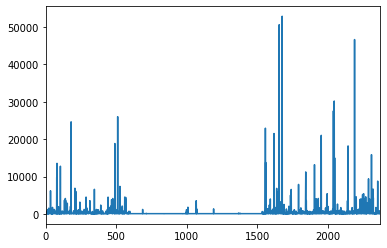

In [225]:
df4["1->2Bytes"].plot()

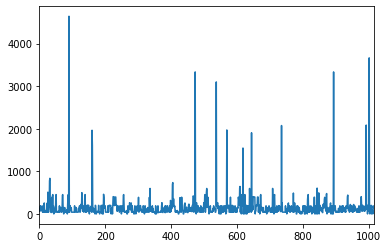

In [226]:
df4old["1->2Bytes"].plot()

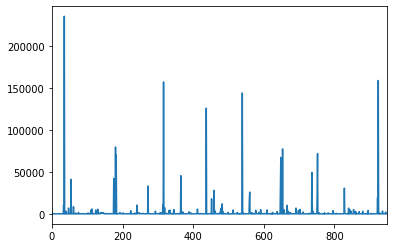

In [227]:
df3["1->2Bytes"].plot()

# 2 to 1 byte comparison

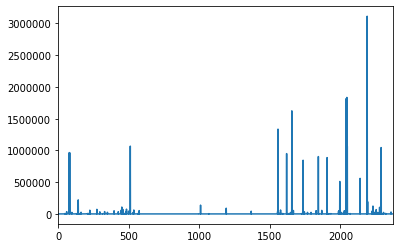

In [228]:
df4["2->1Bytes"].plot()

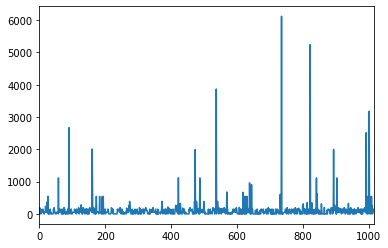

In [229]:
df4old["2->1Bytes"].plot()

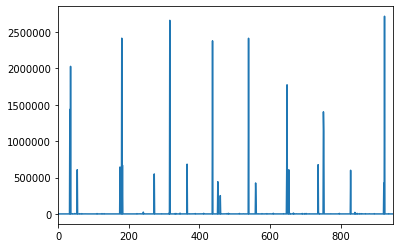

In [230]:
df3["2->1Bytes"].plot()

# Conclusion from byte comparions 
The new data sets I uploaded have data more simlar to video browsing. While I was browing I was going on websites in which a lot of images would have to load. I made browsing data more active so it would be similar to video streaming data this will allow me to test my old alogrithim on new data to see how it holds.

In [231]:
# data cleaning
# helper method to sum all package lengths for each entry in a column
def package(input1):
    sum1 = 0
    for x in input1:
        if x  != "":
            sum1 += int(x)
    return sum1

# adds total pacakge length to all dataframes
def packet_length(frames):
    for j in frames:
        j["sum of sizes"] = pd.Series(j.packet_sizes.apply(lambda x: x.split(";"))).apply(lambda x: package(x))

#label the data
def label():
    for x in video_frames:
            x["Label"] = 1
    for j in browsing_frames:
            j["Label"] = 0


In [232]:
# labes data 
label()

# total packet length
packet_length(list_of_frames)

In [233]:
def ml_model_data(frames):
    # global_varaiables for data storage
    X_train_df =  None
    X_test_df  = None
    y_train_df = None
    y_test_df = None

    for f in frames:
        #isolate features in frames
        X = f[["sum of sizes", "1->2Bytes","2->1Bytes"]]
        
        #isolate label
        y = f[["Label"]]
        
        #split data between training and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
       
        #gatther data from all dataframes
        X_train_df = pd.concat([X_train_df, X_train])
        X_test_df = pd.concat([X_test_df, X_test])
        y_train_df = pd.concat([y_train_df, y_train])
        y_test_df = pd.concat([y_test_df, y_test])
        
        
        
    return [X_train_df,X_test_df,y_train_df,y_test_df]
        

In [234]:
All_data = ml_model_data(list_of_frames)

In [235]:
def logistic_predictions(ml_model_data):
    clf = LogisticRegression()
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1]) 
    return predictions 

In [236]:
def svm_predictions(ml_model_data):
    clf = svm.SVC()
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1])
    return predictions

In [237]:
def bayes_predictions(ml_model_data):
    clf =  GaussianNB()
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1])
    return predictions 

In [238]:
def k_predictions(ml_model_data):
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1])
    return predictions 

In [239]:
k_preds = k_predictions(All_data)
all_preds["k"] = k_preds

C:\Users\dania\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [240]:
bayes_preds = bayes_predictions(All_data)
all_preds["bayes"] = bayes_preds

C:\Users\dania\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [241]:
svm_preds = svm_predictions(All_data)
all_preds["svm"] = svm_preds

C:\Users\dania\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dania\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [242]:
predictions = logistic_predictions(All_data)
all_preds["LogisticRegression"] = predictions

C:\Users\dania\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dania\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [210]:
for x in all_preds:
    percent_correct = sum(np.array(All_data[3]["Label"]) == np.array(all_preds[x]))/len(All_data[3]["Label"])
    print(str(x) +" "+ str(percent_correct) + " correct")

k 0.9198542805100182 correct
bayes 0.819672131147541 correct
svm 0.9049180327868852 correct
LogisticRegression 0.8214936247723132 correct


In [211]:
for x in all_preds:
    print("The mean squared error of "+str(x) + " "+ str(mean_squared_error(All_data[3]["Label"], all_preds[x])))

The mean squared error of k 0.08014571948998178
The mean squared error of bayes 0.18032786885245902
The mean squared error of svm 0.09508196721311475
The mean squared error of LogisticRegression 0.1785063752276867


The code that is running on the new data seems to be doing slightly better than the code with the old data. This is suprising to me I thought modes would decrease in accuaracy because it would be harder to label the data because the new data is more similar to the video data. I think maybe the patterns in new data may be more distinct than I thought.

## SVM MODEL 

In [294]:
def ml_model_svm(frames):
    # global_varaiables for data storage
    X_train_df =  None
    X_test_df  = None
    y_train_df = None
    y_test_df = None

    for f in frames:
        #isolate features in frames
        X = ff[["1->2Bytes","2->1Bytes"]]
        
        #isolate label
        y = f[["Label"]]
        
        #split data between training and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
       
        #gatther data from all dataframes
        X_train_df = pd.concat([X_train_df, X_train])
        X_test_df = pd.concat([X_test_df, X_test])
        y_train_df = pd.concat([y_train_df, y_train])
        y_test_df = pd.concat([y_test_df, y_test])
        
        
        
    return [X_train_df,X_test_df,y_train_df,y_test_df]   

In [295]:
def svm_1(ml_model_data):
    clf = svm.SVC()
    clf.fit(ml_model_data[0], ml_model_data[2])
    predictions = clf.predict(ml_model_data[1])
    return predictions 

In [296]:
All_data = ml_model_data1(list_of_frames)
new_b = svm_1(All_data)
percent_correct = sum(np.array(All_data[3]["Label"]) == np.array(new_b))/len(All_data[3]["Label"])
percent_correct

C:\Users\dania\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dania\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.921311475409836

In [297]:
tn, fp, fn, tp = confusion_matrix(All_data[3]["Label"], new_b).ravel()

In [298]:
print("The true negatives " + str(tn))
print("The true positives " + str(tp))
print("The False positives " + str(fp))
print("The False negatives " + str(fn))

The true negatives 2211
The true positives 318
The False positives 18
The False negatives 198


In [300]:
All_data[3][All_data[3]["Label"] != new_b].head()

,Label
247,1
25,1
246,1
91,1
313,1


In [301]:
np.array(All_data[3]["Label"][:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [302]:
new_b[:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)